In [6]:
import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt

# 9.32

Use algorith 9.1, plot the Chebyshev interpolating polynomials of degree $2^k$ for $k=1, \dots, 7$ for the function
\begin{equation}
    f(x)=
    \begin{cases}
        1 + x & \text{if } x<0 \\
        x & \text{if } x \geq 0
    \end{cases}
\end{equation}
on the interval $[-1,1]$. Also graph $f$ for comparison in each of the plots.

In [7]:
def cheb_interp(f, n):
    """ Compute the coefficient of the degree-n Chebyshev
    interpolation of f at the extremizers y_k=cos(k pi/n) 
    """

    y = np.cos((np.pi * np.arange(2*n)) / n)
    samples = f(y)

    coeffs = np.real(fft(samples))[:n+1] / n
    coeffs[0] = coeffs[0]/2
    coeffs[n] = coeffs[n]/2

    return coeffs

C:\Users\dseyf\AppData\Local\Temp\ipykernel_19564\2431129528.py:16: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  p_values = [np.sum(coeffs[i] * T(domain[j], i) for i in range(len(coeffs))) for j in range(len(domain))]
C:\Users\dseyf\AppData\Local\Temp\ipykernel_19564\2431129528.py:16: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  p_values = [np.sum(coeffs[i] * T(domain[j], i) for i in range(len(coeffs))) for j in range(len(domain))]
C:\Users\dseyf\AppData\Local\Temp\ipykernel_19564\2431129528.py:16: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  p_values = [np.sum(coeffs[i] * T(domain[j],

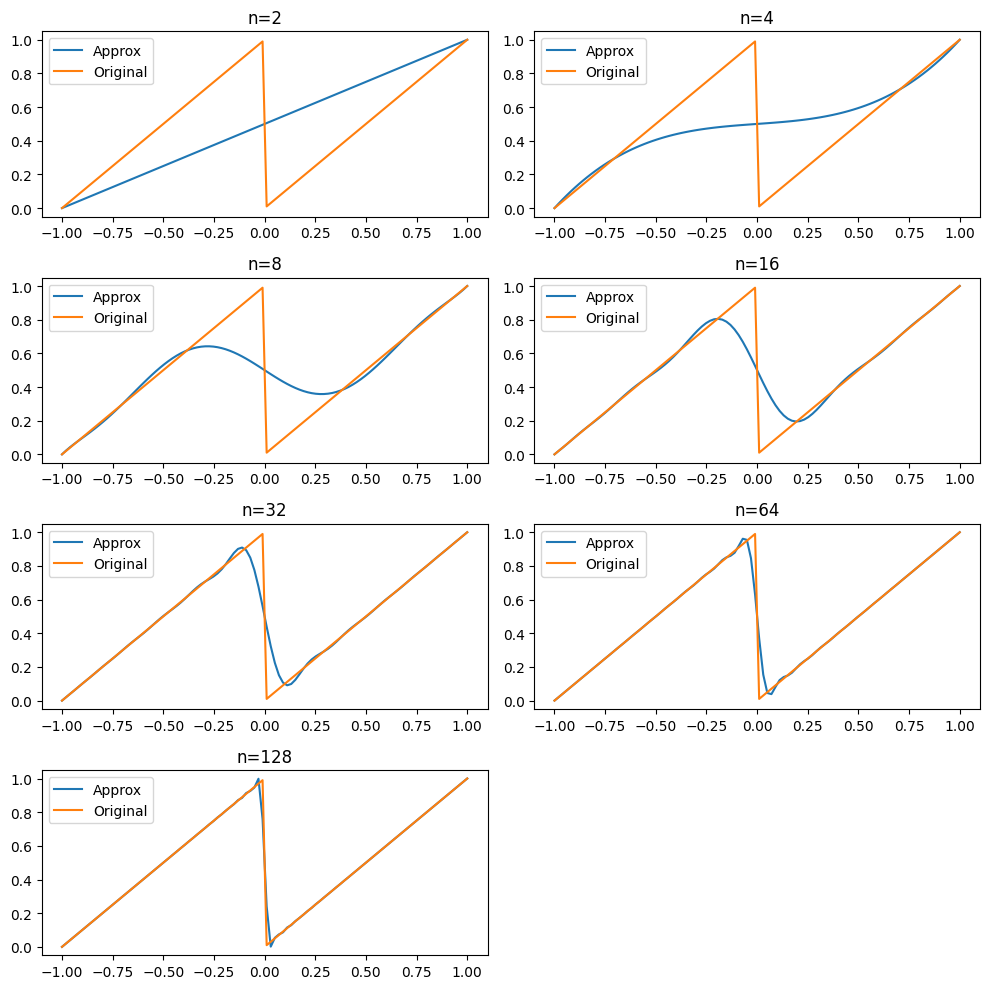

In [28]:
# Create lambda functions for interpolating polynomials
f_temp = lambda x : 1 + x if x < 0 else x
f = np.vectorize(f_temp)
T = lambda x, n : np.cos(n * np.arccos(x))

domain = np.linspace(-1, 1, 100)

plt.figure(figsize=(10,10))

# Cycle and generate each approximation
for i, k in enumerate([j for j in range(1, 8)]):
    n = 2**k
    coeffs = cheb_interp(f, n)

    # Generate the polynomial values to plot
    p_values = [np.sum(coeffs[i] * T(domain[j], i) for i in range(len(coeffs))) for j in range(len(domain))]

    # Plot each approximation
    plt.subplot(4,2,i+1)
    plt.plot(domain, p_values, label="Approx")
    plt.plot(domain, f(domain), label="Original")
    plt.legend()
    plt.title(f"n={n}")

plt.tight_layout()
plt.show()

